Training a segmentation model with fastai, using a subset of the [Camvid dataset](http://www0.cs.ucl.ac.uk/staff/G.Brostow/papers/Brostow_2009-PRL.pdf)

In [1]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.0 MB/s eta 0:00:00


In [3]:
from fastai.vision.all import *

In [5]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/labels')]

The images folder contains the images, and the corresponding segmentation masks of labels are in the labels folder. The codes file contains the corresponding integer to class (the masks have an int value for each pixel).

In [9]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

get all the images from image folder

In [14]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0016E5_06240.png')

let's have a look in the label folder

In [15]:
(path/'labels').ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f03210_P.png')

It seems the segmentation masks have the same base names as the images but with an extra _P, so we can define a label function:

In [16]:
def label_func(fn):
  return path/"labels"/f"{fn.stem}_P{fn.suffix}"

We can then gather our data using SegmentationDataLoaders:
* We do not need to pass item_tfms to resize our images here because they already are all of the same size.

In [17]:
dls = SegmentationDataLoaders.from_label_func( path, bs=8, fnames = fnames, label_func = label_func, codes = codes)

As usual, we can have a look at our data with the show_batch method.

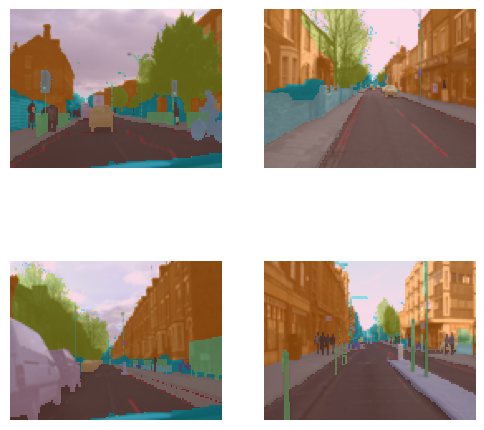

In [22]:
dls.show_batch(max_n=4)     #max_n denotes how many pictures i want

A traditional CNN won’t work for segmentation, we have to use a special kind of model called a UNet, so we use unet_learner to define our Learner:

In [23]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

epoch,train_loss,valid_loss,time
0,2.869188,2.159773,01:30


epoch,train_loss,valid_loss,time
0,1.910288,1.499672,01:31
1,1.634033,1.171194,01:32
2,1.452645,1.066679,01:31
3,1.277060,0.919732,01:33
4,1.139536,0.839284,01:35
5,1.035846,0.822344,01:34


And as before, we can get some idea of the predicted results with show_results

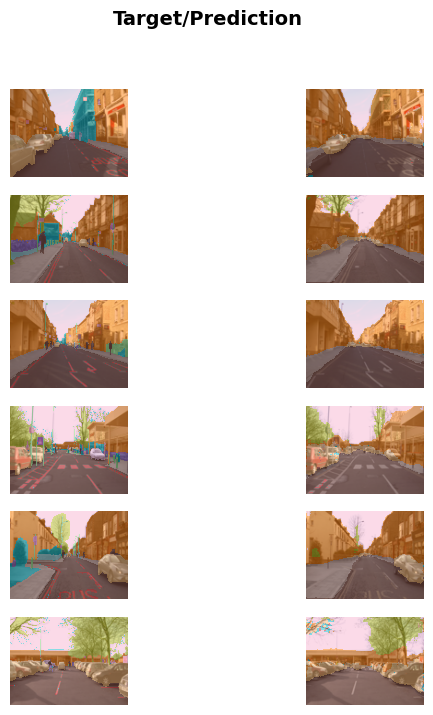

In [24]:
learn.show_results(max_n=6, figsize=(7,8))